# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


### Generate the Cities List by Using the `citipy` Library

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [11]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.497964578149066 -36.25401071594274
-28.082182256733923 -11.41413011679822
74.20698848970264 -79.4211801807763
-13.106525059376224 24.62126180611338
-80.82649858920317 -43.91724340992033
-37.875580572915965 83.53142539326228
-2.8612233236431024 42.923059736287456
-10.426757729210436 -69.68262732763598
-42.00895708294742 65.7380217917082
-62.85636909288672 154.21072979505738
82.82797119861289 -41.47728365800771
28.271238688553254 162.17350610303805
-46.52608879158565 94.77860769113721
-62.381211356370585 -121.27653802597686
-38.81814177844577 16.8535548066576
74.00614828847938 -150.20960933285662
10.25724288321183 -102.35001964088097
-13.5285807969356 143.76469925054835
10.009333181856107 58.18658092946046
14.669349385930019 158.97906768965004
-57.314656311848644 -176.58423874955352
-26.616971665056504 119.33500565361368
62.46187679541876 -87.6569374140246
59.00442003700752 -56.84545467545331
-83.74480646820062 -142.7110865550938
34.11477866182382 -98.21830010480929
14.157407515262008

In [12]:
from citipy import citipy

In [13]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [14]:
# Import the requests library.
import requests

# Import the API key.
from api_keys import weather_api_key

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
# # Starting URL for Weather Map API Call.
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "units=metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&{units}&q="


In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = query_url + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nanortalik
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | kalengwa
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 8 of Set 1 | iberia
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | acapulco
Processing Record 18 of Set 1 | mareeba
Processing Record 19 of Set 1 | bargal
City not found. Skipping...
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | v

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
#Display dataframe
#city_data_df.head(10)

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nanortalik,60.1432,-45.2371,-11.26,82,98,5.09,GL,2023-02-02 22:53:25
1,Jamestown,42.0970,-79.2353,1.77,42,0,7.72,US,2023-02-02 22:46:13
2,Qaanaaq,77.4840,-69.3632,-17.16,62,14,4.27,GL,2023-02-02 22:57:34
3,Kalengwa,-13.4659,25.0027,17.80,95,100,0.55,ZM,2023-02-02 22:59:38
4,Ushuaia,-54.8000,-68.3000,15.81,55,0,6.17,AR,2023-02-02 22:50:09


In [20]:
#Create the output file (CSV)
output_data = "weather_data/cities.csv"
# Export the City_Data into a csv
city_data_df.to_csv("Output/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("Output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Nanortalik,60.1432,-45.2371,-11.26,82,98,5.09,GL,2023-02-02 22:53:25
1,Jamestown,42.0970,-79.2353,1.77,42,0,7.72,US,2023-02-02 22:46:13
2,Qaanaaq,77.4840,-69.3632,-17.16,62,14,4.27,GL,2023-02-02 22:57:34
3,Kalengwa,-13.4659,25.0027,17.80,95,100,0.55,ZM,2023-02-02 22:59:38
4,Ushuaia,-54.8000,-68.3000,15.81,55,0,6.17,AR,2023-02-02 22:50:09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

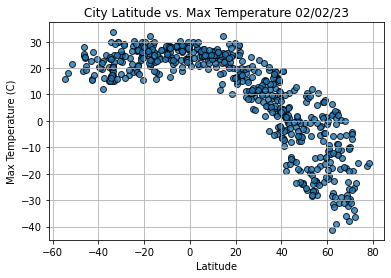

<Figure size 1080x1080 with 0 Axes>

In [22]:
import time
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolor ="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.figure(figsize=(15,15))

# Save the figure.
plt.savefig("Output/Fig1.png")

# Show plot.
plt.show()


#### Latitude Vs. Humidity

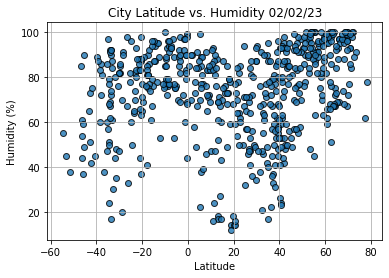

<Figure size 1080x1080 with 0 Axes>

In [23]:
import time
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolor ="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.figure(figsize=(15,15))

# Save the figure
plt.savefig("Output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE